In [1]:
using PyPlot

In [2]:
function reflection(nsteps, dt; D=5, x0 = 0.1)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        if q < 0.0
            pos[i] = -q
        else
            pos[i] = q
        end
    end
    pos
end
        
    

reflection (generic function with 1 method)

In [58]:
function rejectionupdating(nsteps, dt; D=1, x0 = 0.0)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        if q < 0.0
            pos[i] = pos[i-1]
        else
            pos[i] = q
        end
    end
    pos
end

rejectionupdating (generic function with 1 method)

In [59]:
function rejectionwithoutupdating(nsteps, dt; D=1, x0 = 0.0)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        while q < 0.0
            q = pos[i-1] + sqrt(2*D*dt)*randn()
        end
        pos[i] = q
    end
    pos
end

rejectionwithoutupdating (generic function with 1 method)

In [7]:
function conc(nsteps, dt; D =1, x0 = 0.1)
    t = (nsteps-1)*dt
    C(x) = 1/(4*pi*D*t)^(1/2)*(exp(-(x-x0)^2/(4*D*t)) + exp(-(x+x0)^2/(4*D*t)) )
end
    

conc (generic function with 1 method)

In [13]:
function behringer(nsteps, dt; D =1, x0 = 0.1)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        while q < 0.0
            q += sqrt(2*D*dt)*randn()
        end
        pos[i] = q
    end
    pos
end
    

behringer (generic function with 1 method)

In [39]:
##Behringer
nsteps = 10000
dt = 1.e-4
posbehringer = behringer(nsteps, dt, D=5, x0 = 0.);
ncaminantes = 10000
for i in 1:ncaminantes
    temppos = reflection(nsteps, dt)
    posbehringer = hcat(posbehringer, temppos)
end

In [26]:
##Reflection
nsteps = 10000
dt = 1.e-4
pos = reflection(nsteps, dt, D=5, x0 = 0.);
ncaminantes = 10000
for i in 1:ncaminantes
    temppos = reflection(nsteps, dt)
    pos = hcat(pos, temppos)
end

In [7]:
nsteps = 10000
dt = 1.e-5
posrejupdt = rejectionupdating(nsteps, dt);
ncaminantes = 1000
for i in 1:ncaminantes
    temppos = rejectionupdating(nsteps, dt)
    posrejupdt = hcat(posrejupdt, temppos)
end

In [8]:
nsteps = 10000
dt = 1.e-5
posrejwupdt = rejectionwithoutupdating(nsteps, dt);
ncaminantes = 1000
for i in 1:ncaminantes
    temppos = rejectionwithoutupdating(nsteps, dt)
    posrejwupdt = hcat(posrejwupdt, temppos)
end

In [14]:
c = conc(nsteps,dt, D=5, x0 = 0.)
q = 0.0:0.01:16
theorconc = [c(i) for i in q];

In [27]:
xfreflection = pos[end,:];
xfrejupdt = posrejupdt[end,:];
xfrejwupdt = posrejwupdt[end,:];

LoadError: UndefVarError: posrejupdt not defined

In [40]:
xfbehringer = posbehringer[end,:];

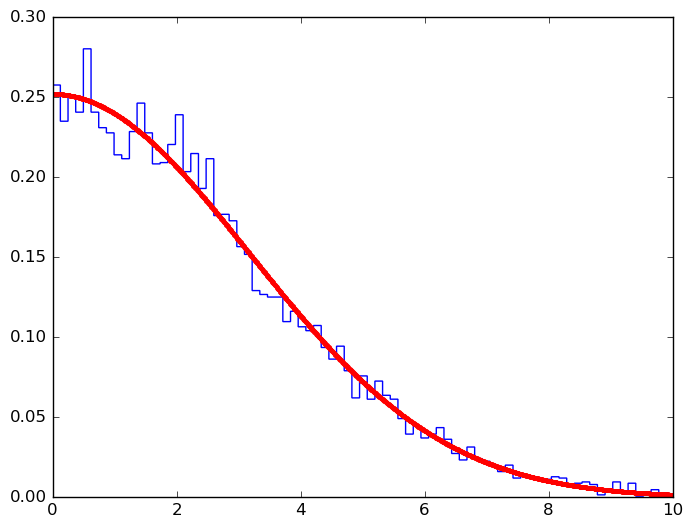

(0,10)

In [41]:
plt[:hist](xfbehringer, 100,normed = 1, histtype = "step", color = "b")
t = dt*(nsteps-1)
plot(q, theorconc, "r.-")
plt[:xlim](0,10)

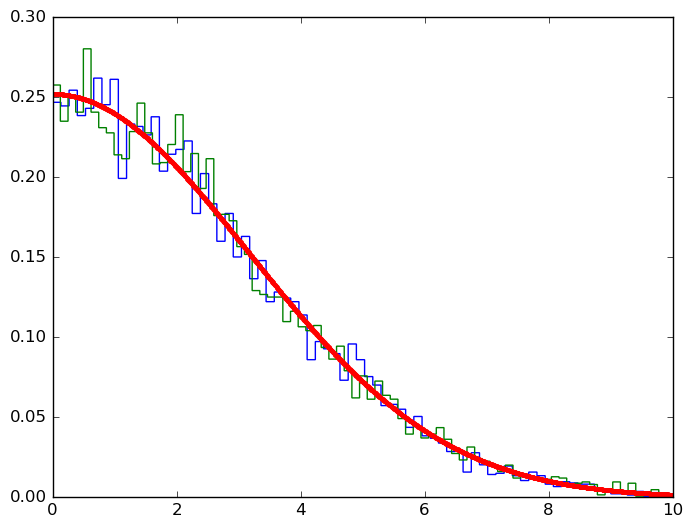

(0,10)

In [42]:
plt[:hist](xfreflection, 100,normed = 1, histtype = "step", color = "b")
plt[:hist](xfbehringer, 100,normed = 1, histtype = "step", color = "g")

t = dt*(nsteps-1)
plot(q, theorconc, "r.-")
plt[:xlim](0,10)

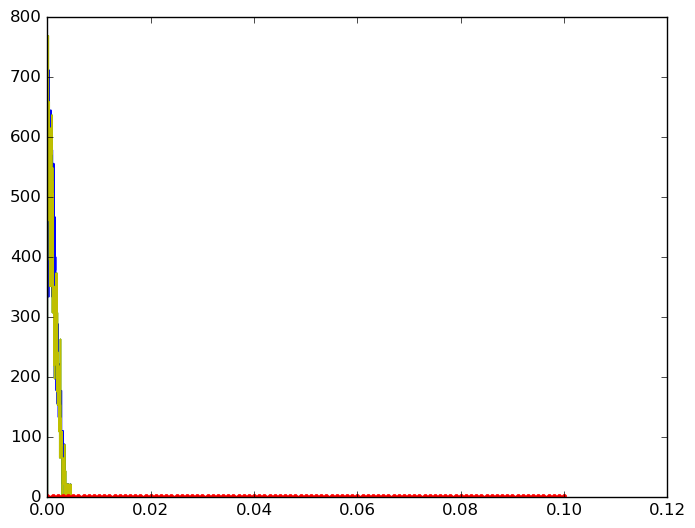

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feac6f1d650>

In [25]:
t = dt*(nsteps-1)
plt[:hist](xfreflection, 100,normed = 1, histtype = "step", color = "b")
plt[:hist](xfrejupdt, 100,normed = 1, histtype = "step", color = "g")
plt[:hist](xfrejupdt, 100,normed = 1, histtype = "step", color = "y")
plot(q, theorconc, "r.-")

In [21]:
using KernelDensity

In [43]:
kbehringer = kde(xfbehringer)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-1.1007161058556971:0.007120580086794933:13.47511133181353,[7.92965e-6,8.83292e-6,9.83481e-6,1.09452e-5,1.21748e-5,1.35354e-5,1.50398e-5,1.6702e-5,1.85371e-5,2.05618e-5  …  2.68195e-6,2.98379e-6,3.32283e-6,3.70291e-6,4.12829e-6,4.60364e-6,5.13413e-6,5.72542e-6,6.38377e-6,7.11601e-6])

In [44]:
kreflection = kde(xfreflection)
krejupdt = kde(xfrejupdt)
krejwupdt = kde(xfrejwupdt)

LoadError: UndefVarError: xfrejupdt not defined

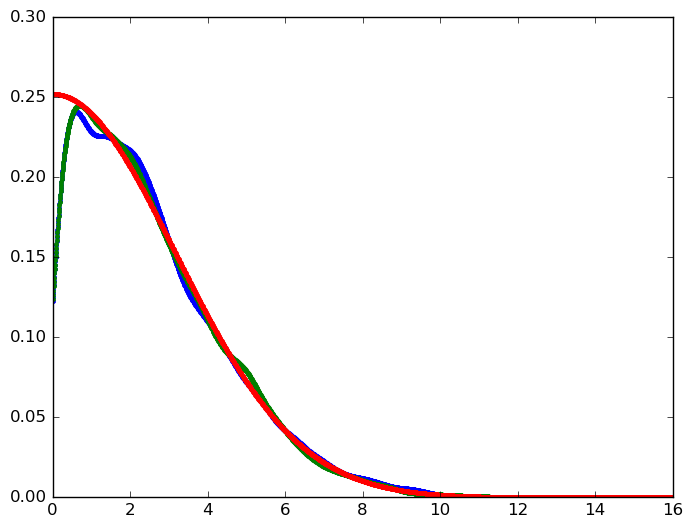

(0,16.0)

In [46]:
plot(kbehringer.x,kbehringer.density,"b.-")
plot(kreflection.x,kreflection.density,"g.-")

plot(q, theorconc, "r.-")
plt[:xlim](0,16.0)

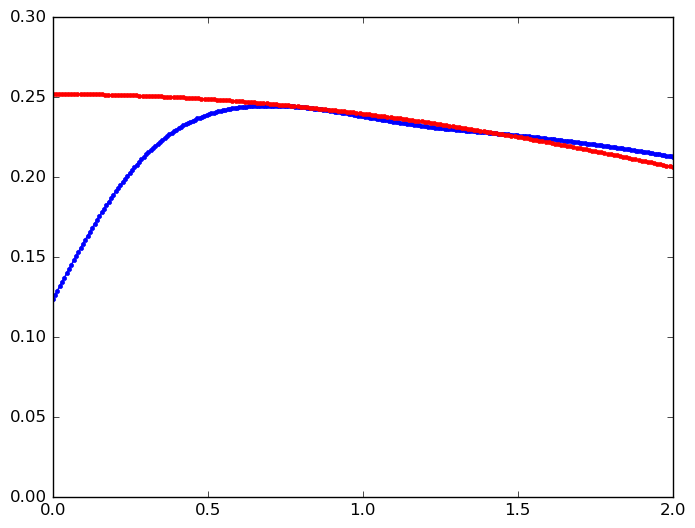

(0,2.0)

In [38]:
plot(kreflection.x,kreflection.density,"b.-")
#plot(krejupdt.x,krejupdt.density,"g.-")
#plot(krejwupdt.x,krejwupdt.density,"y.-")

plot(q, theorconc, "r.-")
plt[:xlim](0,2.0)